# 🧠 EEG Confusion Detection with Transformers





In [19]:
# ✅ Step 1: Install base dependencies
!pip install torch numpy pandas scikit-learn matplotlib

In [44]:
# ✅ Step 2: Upload the project zip (eeg_confusion_transformer_starter.zip)
from google.colab import files
uploaded = files.upload()  # choose the zip file you downloaded earlier

Saving eeg_confusion_transformer_starter.zip to eeg_confusion_transformer_starter.zip


In [45]:
# ✅ Step 3: Unzip project and move into folder
!unzip -o eeg_confusion_transformer_starter.zip -d eeg_project
%cd eeg_project

# install extra requirements
!pip install -r requirements.txt

Archive:  eeg_confusion_transformer_starter.zip
  inflating: eeg_project/requirements.txt  
  inflating: eeg_project/README.md   
  inflating: eeg_project/utils.py    
  inflating: eeg_project/data_prep.py  
  inflating: eeg_project/models.py   
  inflating: eeg_project/visualize.py  
  inflating: eeg_project/inference.py  
  inflating: eeg_project/train.py    
/content/eeg_project/eeg_project/eeg_project/eeg_project/eeg_project


In [46]:
# ✅ Step 4: Upload your EEG_data.csv
from google.colab import files
uploaded = files.upload()  # choose EEG_data.csv

# it will be in /content/EEG_data.csv

Saving EEG_data.csv to EEG_data.csv


In [47]:
# ✅ Step 5: Train Transformer model (LOSO CV)
!python train.py --csv /content/EEG_data.csv --model transformer --epochs 30



[SID 0] acc=1.000 f1=1.000
[SID 1] acc=1.000 f1=1.000
[SID 2] acc=0.400 f1=0.250
[SID 3] acc=0.800 f1=0.833
[SID 4] acc=0.900 f1=0.923
[SID 5] acc=1.000 f1=1.000
[SID 6] acc=0.500 f1=0.667
[SID 7] acc=0.900 f1=0.923
[SID 8] acc=1.000 f1=1.000
[SID 9] acc=0.700 f1=0.769
CV mean: {'subject': 4.5, 'acc': 0.82, 'f1': 0.8365384615384617}
Global ROC-AUC: 0.803


In [48]:
# ✅ Step 6A: Show per-subject and mean metrics
import pandas as pd, glob

# Find latest run folder
run_folders = sorted(glob.glob("runs/*"))
latest_run = run_folders[-1]
print("Latest run folder:", latest_run)

# Load cross-validation metrics
cv_metrics = pd.read_csv(f"{latest_run}/cv_metrics.csv")
display(cv_metrics)

print("\nAverage across subjects:")
display(cv_metrics.mean(numeric_only=True))


Latest run folder: runs/transformer-20250824-164413


,subject,acc,f1
0,0,1.0,1.000000
1,1,1.0,1.000000
2,2,0.4,0.250000
3,3,0.8,0.833333
4,4,0.9,0.923077
5,5,1.0,1.000000
6,6,0.5,0.666667
7,7,0.9,0.923077
8,8,1.0,1.000000
9,9,0.7,0.769231



Average across subjects:


,0
subject,4.500000
acc,0.820000
f1,0.836538


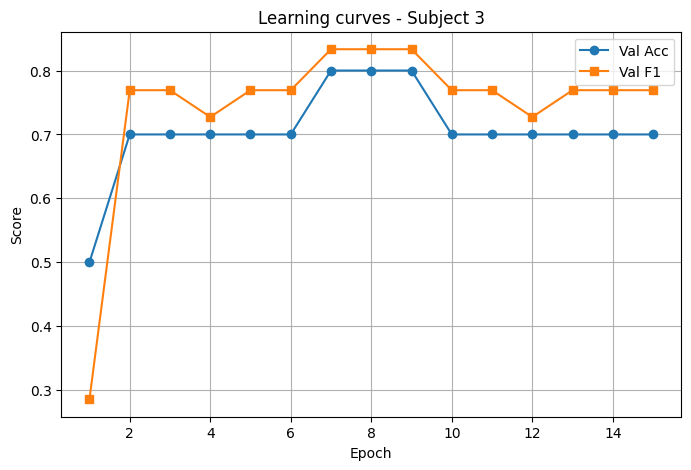

In [54]:
# ✅ Step 6B: Plot learning curves for one subject
import matplotlib.pyplot as plt
import pandas as pd

subject_id = 3 # change this to see other subjects
hist = pd.read_csv(f"{latest_run}/subject_{subject_id}/history.csv")

plt.figure(figsize=(8,5))
plt.plot(hist["epoch"], hist["val_acc"], label="Val Acc", marker="o")
plt.plot(hist["epoch"], hist["val_f1"], label="Val F1", marker="s")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title(f"Learning curves - Subject {subject_id}")
plt.legend()
plt.grid(True)
plt.show()


In [52]:
# ✅ Step 6C: Inspect predictions for one subject
subject_id = 3  # pick subject folder
preds = pd.read_csv(f"{latest_run}/subject_{subject_id}/preds.csv")
print(preds.head(10))  # show first 10 predictions

# quick accuracy check
acc = (preds["pred"] == preds["label"]).mean()
print(f"Accuracy on Subject {subject_id}: {acc:.3f}")


       prob  pred  label
0  0.794447     1      0
1  0.292309     0      0
2  0.235156     0      0
3  0.634284     1      0
4  0.905526     1      1
5  0.469141     0      0
6  0.737807     1      1
7  0.622310     1      1
8  0.500943     1      1
9  0.956063     1      1
Accuracy on Subject 3: 0.800


Latest run folder: runs/transformer-20250824-164413
Using checkpoint: runs/transformer-20250824-164413/subject_0/best.pt


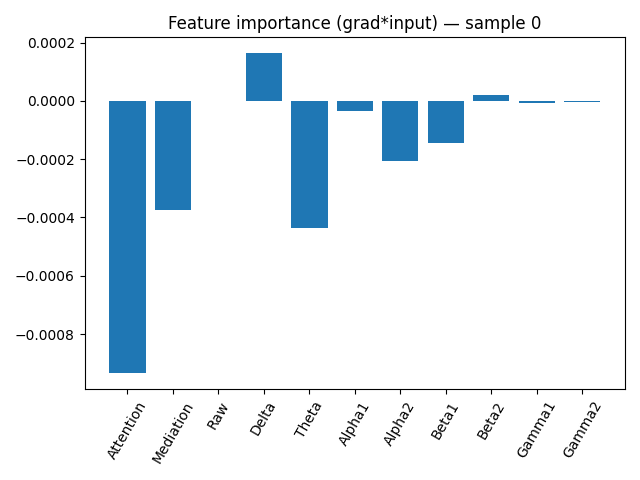

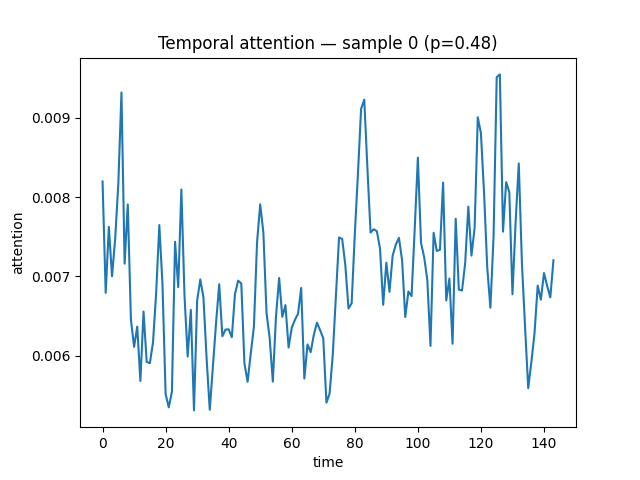

In [53]:
# ✅ Step 6: Auto Visualize attention & feature importance

import os, glob, subprocess
from IPython.display import Image, display

# Find the latest run folder
run_folders = sorted(glob.glob("runs/*"), key=os.path.getmtime)
latest_run = run_folders[-1]
print("Latest run folder:", latest_run)

# Pick subject_0 checkpoint (you can change to subject_1, subject_2, etc.)
ckpt_path = os.path.join(latest_run, "subject_0", "best.pt")
print("Using checkpoint:", ckpt_path)

# Run visualize.py
!python visualize.py --csv /content/EEG_data.csv --ckpt "$ckpt_path" --model transformer

# Show example plots
if os.path.exists("viz_out/sample_0_feat_importance.png"):
    display(Image("viz_out/sample_0_feat_importance.png"))
if os.path.exists("viz_out/sample_0_attn_time.png"):
    display(Image("viz_out/sample_0_attn_time.png"))
